<a href="https://colab.research.google.com/github/Alphaleader007/DL/blob/main/Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import load_breast_cancer
data=load_breast_cancer()


In [ ]:
type(data)

sklearn.utils.Bunch

In [ ]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [ ]:
data.data.shape

(569, 30)

In [ ]:
data.target.shape

(569,)

In [ ]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [ ]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data.data,data.target,test_size=0.33)

In [ ]:
N,D=X_train.shape


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
model=nn.Sequential(
    nn.Linear(D,1),
    nn.Sigmoid()
)

In [ ]:
criterion=nn.BCELoss()
optimizer=torch.optim.Adam(model.parameters())

In [ ]:
X_train=torch.from_numpy(X_train.astype(np.float32))
X_test=torch.from_numpy(X_test.astype(np.float32))
y_train=torch.from_numpy(y_train.astype(np.float32).reshape(-1,1))
y_test=torch.from_numpy(y_test.astype(np.float32).reshape(-1,1))

In [ ]:
n_epochs=1000
train_losses=np.zeros(n_epochs)
test_losses=np.zeros(n_epochs)

for it in range(n_epochs):
  optimizer.zero_grad()
  outputs=model(X_train)
  loss=criterion(outputs,y_train)
  loss.backward()
  optimizer.step()
  outputs_test=model(X_test)
  loss_test=criterion(outputs_test,y_test)

  train_losses[it]=loss.item()
  test_losses[it]=loss_test.item()

  if (it+1) % 50 ==0:
    print(f'Epoch {it+1}/{n_epochs} , Train loss: {loss.item():.4f} , Test loss: {loss_test.item():.4f} ')

Epoch 50/1000 , Train loss: 0.5571 , Test loss: 0.5616 
Epoch 100/1000 , Train loss: 0.4059 , Test loss: 0.4221 
Epoch 150/1000 , Train loss: 0.3225 , Test loss: 0.3465 
Epoch 200/1000 , Train loss: 0.2686 , Test loss: 0.2988 
Epoch 250/1000 , Train loss: 0.2310 , Test loss: 0.2657 
Epoch 300/1000 , Train loss: 0.2035 , Test loss: 0.2413 
Epoch 350/1000 , Train loss: 0.1826 , Test loss: 0.2227 
Epoch 400/1000 , Train loss: 0.1664 , Test loss: 0.2080 
Epoch 450/1000 , Train loss: 0.1534 , Test loss: 0.1961 
Epoch 500/1000 , Train loss: 0.1428 , Test loss: 0.1862 
Epoch 550/1000 , Train loss: 0.1339 , Test loss: 0.1780 
Epoch 600/1000 , Train loss: 0.1265 , Test loss: 0.1710 
Epoch 650/1000 , Train loss: 0.1201 , Test loss: 0.1649 
Epoch 700/1000 , Train loss: 0.1145 , Test loss: 0.1596 
Epoch 750/1000 , Train loss: 0.1097 , Test loss: 0.1549 
Epoch 800/1000 , Train loss: 0.1054 , Test loss: 0.1508 
Epoch 850/1000 , Train loss: 0.1016 , Test loss: 0.1471 
Epoch 900/1000 , Train loss: 0.0

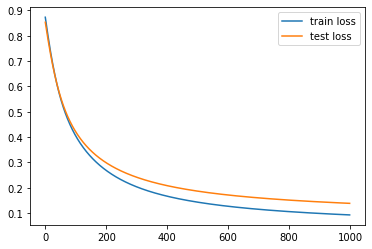

In [ ]:
plt.plot(train_losses,label="train loss")
plt.plot(test_losses,label="test loss")
plt.legend()
plt.show()

In [ ]:
with torch.no_grad():
  p_train=model(X_train)
  p_train=np.round(p_train.numpy())
  train_acc=np.mean(y_train.numpy()==p_train)

  p_test=model(X_test)
  p_test=np.round(p_test.numpy())
  test_acc=np.mean(y_test.numpy()==p_test)
print(f'Training Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}')


Training Acc: 0.9843, Test Acc: 0.9574


**Save and Load Model**

In [ ]:
model.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.4046, -0.2297, -0.2879, -0.4804, -0.1626, -0.2159, -0.3944, -0.2320,
                       -0.2443,  0.3914, -0.4282, -0.1348, -0.2115, -0.3342,  0.0896, -0.1120,
                        0.2691, -0.3760,  0.4099,  0.2733, -0.3567, -0.4494, -0.4038, -0.1919,
                       -0.4328, -0.1421, -0.2274, -0.3125, -0.4002, -0.1879]])),
             ('0.bias', tensor([0.4921]))])

In [ ]:
torch.save(model.state_dict(),"model1.pt")

In [ ]:
!ls


model1.pt  sample_data


In [ ]:
model2=nn.Sequential(
    nn.Linear(D,1),
    nn.Sigmoid()
)

In [ ]:
model2.load_state_dict(torch.load("model1.pt"))

<All keys matched successfully>

In [ ]:
with torch.no_grad():
  p_train=model2(X_train)
  p_train=np.round(p_train.numpy())
  train_acc=np.mean(y_train.numpy()==p_train)

  p_test=model2(X_test)
  p_test=np.round(p_test.numpy())
  test_acc=np.mean(y_test.numpy()==p_test)
print(f'Training Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}')

Training Acc: 0.9843, Test Acc: 0.9574
